# 00. Table of contents
- Importing libraries and dataset
- Importing and merging GDP per capita dataset
- Creating correlation matrix heatmap
- Creating scatterplots (daily mean vs. population and GDP per Capita)
- Creating pair plot
- Creating a categorical plot
- Revisiting the initial analysis questions and forming hypothesis

# 01. Importing libraries and dataset

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os



In [2]:
#importing dataset
path = r'C:\Users\viki\Documents\Data Analytics\Immersion\Achievement 6\02_Data'
df= pd.read_csv(os.path.join(path, 'Prepared_Data', 'merged_cleaned_dataset.csv'))

# 02. Importing and merging GDP per capita dataset

In [3]:
#importing dataset of GDP per capita
df_gdp= pd.read_csv(os.path.join(path, 'Prepared_Data', 'GDP_per_capita_transposed.csv'))

In [4]:
#merging the two datasets
df_full=pd.merge(df, df_gdp, on=['year','Country'], how='left')

In [5]:
df_full.head(10)

,year,metabolite,SiteID,Country,City,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Weekday mean,Weekend mean,Daily mean,latitude,longitude,population,Country Name,GDP per Capita(USD)
0,2021,amphetamine,AT001,AT,Graz,47.15,37.48,37.95,38.02,38.14,35.82,35.45,40.03,37.48,38.57,47.070713,15.439504,487040.0,NaN,NaN
1,2021,cannabis,AT001,AT,Graz,54.77,80.42,60.10,53.88,50.46,77.04,233.51,122.90,60.37,87.17,47.070713,15.439504,487040.0,NaN,NaN
2,2021,cocaine,AT001,AT,Graz,127.60,121.48,137.75,174.94,179.55,117.31,111.91,120.33,152.39,138.65,47.070713,15.439504,487040.0,NaN,NaN
3,2021,MDMA,AT001,AT,Graz,5.82,4.53,5.27,16.56,17.37,10.14,7.83,6.06,12.33,9.64,47.070713,15.439504,487040.0,NaN,NaN
4,2021,methamphetamine,AT001,AT,Graz,12.44,11.24,14.99,9.33,18.66,9.33,15.66,13.11,13.08,13.09,47.070713,15.439504,487040.0,NaN,NaN
5,2020,amphetamine,AT001,AT,Graz,22.49,25.64,24.75,48.79,25.79,27.86,29.58,25.90,31.80,29.27,47.070713,15.439504,487040.0,Austria,48588.65938
6,2020,cannabis,AT001,AT,Graz,46.87,48.68,44.34,67.07,37.48,58.17,52.23,49.26,51.77,50.69,47.070713,15.439504,487040.0,Austria,48588.65938
7,2020,cocaine,AT001,AT,Graz,98.22,107.09,138.97,277.65,141.82,113.55,90.27,98.53,168.00,138.22,47.070713,15.439504,487040.0,Austria,48588.65938
8,2020,MDMA,AT001,AT,Graz,6.13,7.97,9.37,30.93,20.11,14.85,9.60,7.90,18.81,14.14,47.070713,15.439504,487040.0,Austria,48588.65938
9,2020,methamphetamine,AT001,AT,Graz,6.33,6.73,5.85,11.30,8.40,7.32,4.97,6.01,8.22,7.27,47.070713,15.439504,487040.0,Austria,48588.65938


In [6]:
df_full.shape

(2569, 20)

# 03. Creating a correlation matrix heatmap

In [9]:
df_full.columns

Index(['year', 'metabolite', 'SiteID', 'Country', 'City', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Weekday mean', 'Weekend mean', 'Daily mean', 'latitude', 'longitude',
       'population', 'Country Name', 'GDP per Capita(USD)'],
      dtype='object')

In [14]:
#creating subset with relevant variables
sub = df_full[['Daily mean','Weekday mean', 'Weekend mean','metabolite','population','year', 'GDP per Capita(USD)']]

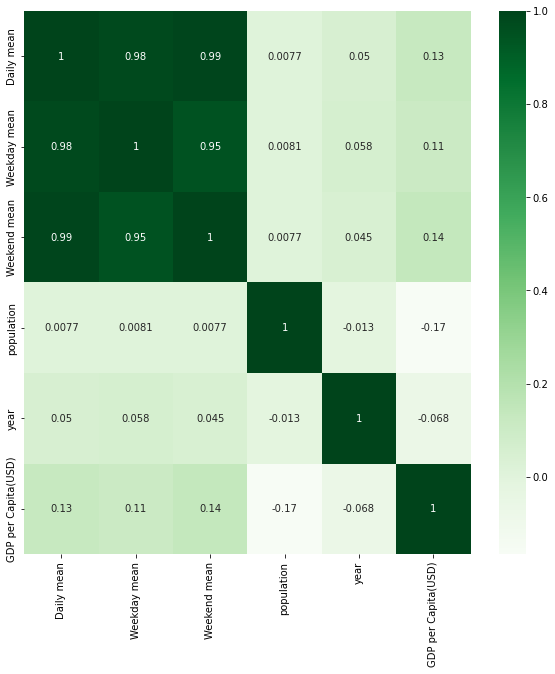

In [17]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

#creating correlation heatmap
corr = sns.heatmap(sub.corr(), annot = True, ax = ax, cmap="Greens")

We cannot observe any real strong relationship among the variables. Weekend, weekday and daily mean variables have a confounding factor in the background and have no real relationship - they are all calculated based on the daily measurements.
A weak positive relationship is suggested by the coefficients between the daily/weekend/weekday mean variables and GDP per capita. Wealthier country residents could more afford to buy and use drugs.

# 04. Creating a Scatterplot

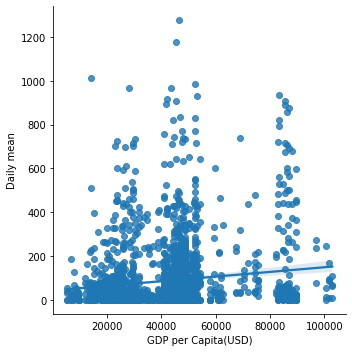

In [27]:
#creating a scatterplot for daily mean and GDP per capita
sns.lmplot(x = 'GDP per Capita(USD)', y = 'Daily mean', data = df_full)

In the scatterplot, we can see the weak positive relationship, the trend line isn’t very steep, and there are many points far away from this line: there’s a great degree of variability.

In [20]:
# checking relationship for population vs. daily mean drug usage for year 2021
sub_2021=df_full[df_full['year']==2021] # subset for year 2021 (where population data is available)

In [21]:
sub_2021.shape

(344, 20)

In [35]:
#calculating correlation coefficient
sub_2021_dailymean_pop= sub_2021[['Daily mean', 'population']]
sub_2021_dailymean_pop.corr()

,Daily mean,population
Daily mean,1.000000,-0.029468
population,-0.029468,1.000000


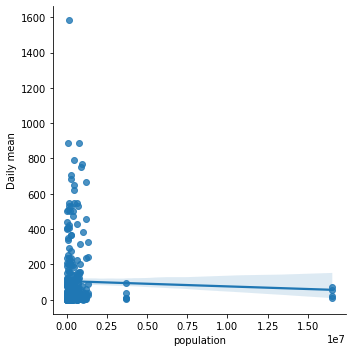

In [37]:
#creating scatterplot
sns.lmplot(x = 'population', y = 'Daily mean', data = sub_2021)

# 05. Creating a pairplot

In [41]:
# Keeping only the variables we want to use in the pair plot

sub_2 = df_full[['Daily mean','metabolite','population','year', 'GDP per Capita(USD)']]

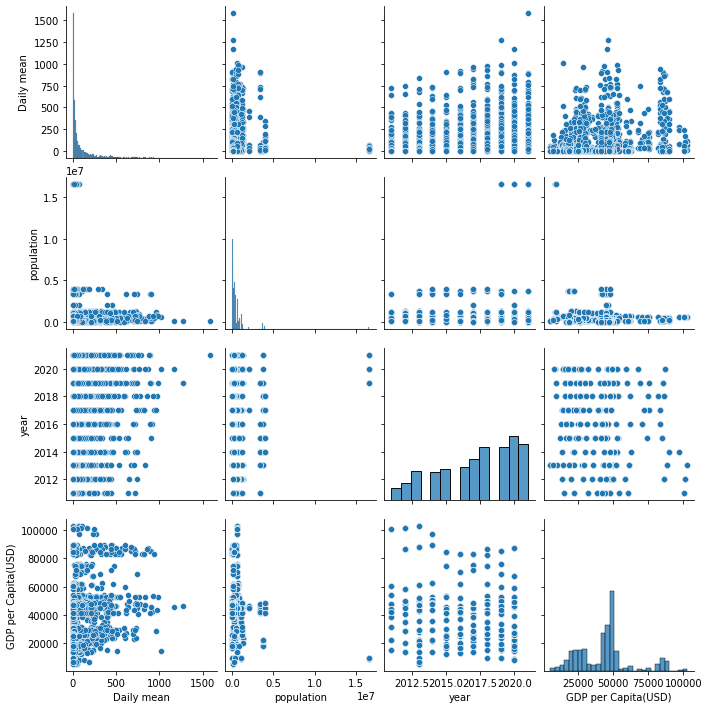

In [44]:
# Create a pair plot for the selected variables 

sns.pairplot(sub_2)

Insights from the pair plot:
- Histogram of daily mean: skewed to the left - it is worth exploring how the distribution looks like in case we split the dataset into the different metabolites ( ->Is there a difference in the usage of different drugs?)
- Histogram of population: this chart is not representative because we have population data only for 2021 and this have been merged to the measurements dataset without considering the year
- Histogram of year: we can see that by the time we have more observations (more cities joined measuring residues in their wastewater)
- relationship of daily mean vs GDP per capita and population have been explored in the previous point
- histogram of GDP per capita: this is the only variable where we found a weak relationship with the daily mean and we will further explore this in the following step, creating a category plot

# 06. Creating a categorical plot

<AxesSubplot:xlabel='GDP per Capita(USD)', ylabel='Count'>

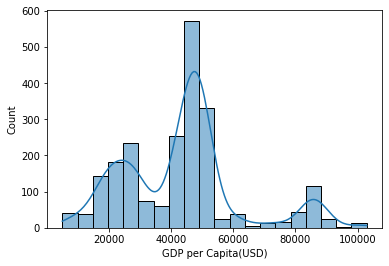

In [46]:
# creating a histogram for GDP per capita to help defining categories
sns.histplot(df_full['GDP per Capita(USD)'], bins = 20, kde = True)

In [51]:
#defining categories
df_full.loc[df_full['GDP per Capita(USD)'] < 35000, 'GDP category'] = 'Low income'
df_full.loc[(df_full['GDP per Capita(USD)'] >= 35000) & (df_full['GDP per Capita(USD)'] < 75000), 'GDP category'] = 'Mid income'
df_full.loc[df_full['GDP per Capita(USD)'] > 75000, 'GDP category'] = 'High income'

In [69]:
# checking valuecount for categories
df_full['GDP category'].value_counts(dropna=False) #we have NaNs because we didnt have GDP values available for year 2021, only until 2020

Mid income     1295
Low income      722
NaN             344
High income     208
Name: GDP category, dtype: int64

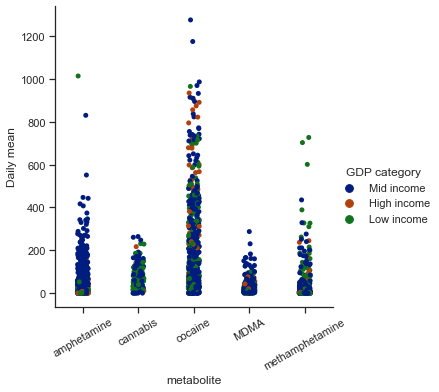

In [68]:
#creating catplot
sns.set(style='ticks')
sns.set_palette('dark')
ax= sns.catplot(x='metabolite', y='Daily mean', hue='GDP category', data=df_full)
ax.set_xticklabels(rotation = 30)

Insights from the pair plot:
- cocaine has the highest range of values in terms of usage amount (daily mean) and the datapoints are divers: all GDP categories can be found 
- the most datapoints of high income countries are under cocaine and these datapoints indicate high amount of usage

# 07. Revisiting inital analysis questions and forming a hypothesis

Initial questions were:
1. Which drugs are the most used in which area of Europe? 
2. What geographical and temporal trends can be observed? 
3. Is there a connection between drug usage and city size / drug usage and country’s wealth (GDP per capita)? 
4. How did the pandemic affect the drug usage in 2020-2021 when social events and interactions were strongly limited?

Question 3 have been explored in this exercise
Question 1,2,4 are connected to spatial and time series analysis which will be explored in later tasks.

Forming hypothesis- there is only one relationship in our dataset existing and that seem to be also weak therefore we cannot form any hypothesis at this point with this dataset

# 08. Exporting dataset with GDP data


In [70]:
df_full.to_csv(os.path.join(path, 'Prepared_Data', 'merged_cleaned_dataset_with_gdp.csv'), index=False)